In [38]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from configNA import consumer_key, consumer_secret, access_token, access_token_secret
from pprint import pprint
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
consumer_key

'PFwh2IvoxPELSRVFgAcOyGwwv'

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Set target twitter accounts 
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Lists to hold user accounts, tweets, dates, & sentiments
user_acct = []
tweet_txt = []
tweet_dt =[]

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [19]:
# Loop through all twitter accounts 
for target in target_users:
    # Loop through 5 times (100 tweets)
    for x in range(5):
        # Get tweets for one page for each user (20 tweets)
        public_tweets = api.user_timeline(target, page=x)
        # Loop through all tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            # Add each value to the appropriate list 
            user_acct.append(target)
            tweet_txt.append(tweet["text"])
            tweet_dt.append(tweet["created_at"])
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

In [20]:
# Convert tweet timestamps to datetime objects
converted_timestamps = []
for dt in tweet_dt:
    converted_time = datetime.strptime(dt, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
# Confirm length of list 
print(len(converted_timestamps))

500


In [78]:
# Create dataframe
df = pd.DataFrame({"Account":user_acct,
                   "Tweet Text":tweet_txt,
                   "Date":converted_timestamps,
                   "Compound":compound_list,
                   "Positive":positive_list,
                   "Negative":negative_list,
                   "Neutral":neutral_list
                  })

df.head()
df2 = df[['Account', 'Date', 'Tweet Text', 'Compound', 'Positive', 'Neutral', 'Negative']]
df2.head()
df2.tail()



,Account,Date,Tweet Text,Compound,Positive,Neutral,Negative
495,@nytimes,2018-03-20 13:17:05+00:00,A package that exploded at a FedEx center near...,0.0000,0.000,1.000,0.000
496,@nytimes,2018-03-20 13:00:11+00:00,"""When I deployed to Iraq in 2003, there was no...",-0.7269,0.000,0.757,0.243
497,@nytimes,2018-03-20 12:45:04+00:00,The Uber car was in autonomous mode with a hum...,-0.2263,0.077,0.810,0.113
498,@nytimes,2018-03-20 12:28:03+00:00,Education Secretary Betsy DeVos has clashed wi...,0.0000,0.000,1.000,0.000
499,@nytimes,2018-03-20 12:15:08+00:00,Andrew Cuomo directed the state attorney gener...,0.0000,0.000,1.000,0.000


In [79]:
#Save df to csv
df2.to_csv("newstweets.csv",index=False)

In [80]:
# Filter df2 by user account for plotting 

bbc = df2.loc[df2["Account"] == "@BBC"]
cbs = df2.loc[df2["Account"] == "@CBS"]
cnn = df2.loc[df2["Account"] == "@CNN"]
fox = df2.loc[df2["Account"] == "@FoxNews"]
nyt = df2.loc[df2["Account"] == "@nytimes"] 




In [81]:
# Sort dfs by date - ascending = F

bbc = bbc.sort_values("Date", ascending=False)
cbs = cbs.sort_values("Date", ascending=False)
cnn = cnn.sort_values("Date", ascending=False)
fox = fox.sort_values("Date", ascending=False)
nyt = nyt.sort_values("Date", ascending=False)

# bbc = bbc.sort_values("Date", ascending=True)
# cbs = cbs.sort_values("Date", ascending=True)
# cnn = cnn.sort_values("Date", ascending=True)
# fox = fox.sort_values("Date", ascending=True)
# nyt = nyt.sort_values("Date", ascending=True)


# bbc.head()

In [39]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


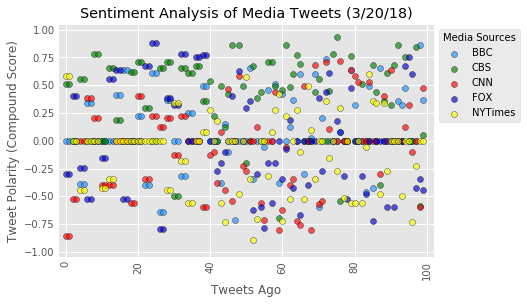

In [89]:
from matplotlib import style
style.use('ggplot')
x_axis = np.arange(0,100)

# Plot all compound scores for each user 
plt.scatter(x_axis, bbc["Compound"], edgecolor="black", color='dodgerblue', marker="o",alpha=0.65, label="BBC")
plt.scatter(x_axis, cbs["Compound"], edgecolor="black", color='green', marker="o", alpha=0.65, label="CBS")
plt.scatter(x_axis, cnn["Compound"], edgecolor="black", color='red', marker="o", alpha=0.65, label="CNN")
plt.scatter(x_axis, fox["Compound"], edgecolor="black", color='mediumblue', marker="o", alpha=0.65, label="FOX")
plt.scatter(x_axis, nyt["Compound"], edgecolor="black", color='yellow', marker="o", alpha=0.65, label="NYTimes")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (3/20/18)")
plt.ylabel("Tweet Polarity (Compound Score)")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1, 1),title="Media Sources")
plt.xticks(rotation="vertical")
plt.grid(True)
plt.xlim(-2,102)
plt.ylim([-1.05, 1.05])

# Save the figure
plt.savefig("SentimentAnalysisScatterplot.png")

# Show plot
plt.show()

In [ ]:
from matplotlib import style
style.use('ggplot')
x_axis = np.arange(0,100)
# Build a scatter plot compound scores for all of the tweets
plt.scatter(range(len(bbc["Date"].values)),
            bbc["Compound"],
            edgecolor="black", color='g', marker="o",
            alpha=0.8, label="BBC")
plt.scatter(range(len(cbs["Date"].values)),
            cbs["Compound"],
            edgecolor="black", color='b', marker="o",
            alpha=0.8, label="CBS")
plt.scatter(range(len(cnn["Date"].values)),
            cnn["Compound"],
            edgecolor="black", color='r', marker="o",
            alpha=0.8, label="CNN")
plt.scatter(range(len(fox["Date"].values)),
            fox["Compound"],
            edgecolor="black", color='y', marker="o",
            alpha=0.8, label="FOX")
plt.scatter(range(len(nyt["Date"].values)),
            nyt["Compound"],
            edgecolor="black", color='c', marker="o",
            alpha=0.8, label="NY Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (3/20/18)")
plt.ylabel("Tweet Polarity (Compound Score)")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation="vertical")
plt.grid(True)
plt.xlim(-2,102)
plt.ylim([-1.05, 1.05])

# Save the figure
plt.savefig("Plot.png")

# Show plot
plt.show()

In [37]:
# Store the Average Sentiments
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    print(sentiment)
    print()

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


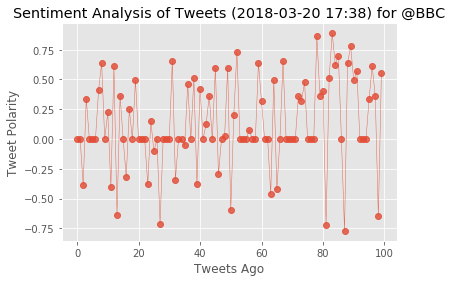

In [15]:
# Create plot
plt.plot(np.arange(len(sentiments_pd_bbc["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, bbc))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [ ]:
# Target User Account
#target_user = "@DalaiLama"

bbc = "@BBC"
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    bbc_tweets = api.user_timeline(bbc)

    # Loop through all tweets
    for tweet in bbc_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [ ]:
# Print the Averages
print(f"User: {bbc}")
print(f"Compound: {np.mean(compound_list):.3f}")
print(f"Positive: {np.mean(positive_list):.3f}")
print(f"Neutral: {np.mean(neutral_list):.3f}")
print(f"Negative: {np.mean(negative_list):.3f}")